# Dependence of the inland effect of a wave frequency

Relates to exercise 5 on page 47.

@olsthoorn, 2012-12-30

The solution for the partial differential equation

$$ kD \frac {\partial^2 s} {\partial x} = S \frac {\partial s} {\partial t} $$

Given the as a boundary condition $s(0, t) = A \sin(\omega t - \theta) $, met $\theta$ a constant, is

$$ s(x, t) = A e^{-a x} \sin(\omega t - ax - \theta) $$

with $\omega T = 2 \pi$ and

$$ a = \sqrt{ \frac {\omega S} {2 kD} } $$

To show the effect of frequency, we will superimpose a number of waves with frequencies taken as prime numbers, such that the will not coincied with one another. It is then expected that the larger $x$, the fewer frequeces will still be present and visible in the groundwater.

## Loading modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Convenience function to set up a graph

In [3]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Implementation

In [4]:
kD = 600 # m2/d
S  = 0.1 # [-]

# a sequence of angle velocities
omega = np.array([1, 3, 5, 7, 11, 13, 17, 19, 23, 29]) / (2 * np.pi) # cycles per day

# some random initial delays
theta = np.random.rand(len(omega)) + 0.5

A = 1.0 # m, Wave amplitude

## Show individual waves, assuming $s=0$ at $t=0$ ($theta = 0$) 

To do this we zip over the arrays `omega` and `theta` to get `omega_i` and `theta_i` as scalars in each cycle.

Then we plot the result for a single time and all values of $x$

This is to show that the damping $a$ depends on the frequency (angular velocity), the higher the frequency, the more the damping is. This follows immediately from the mathematical expression of $a$.

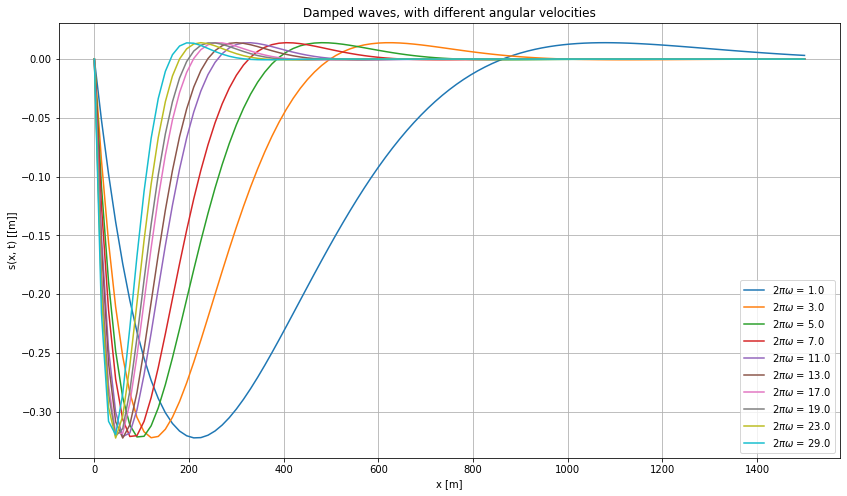

In [5]:
t = 0.35
x = np.linspace(0, 1500, 101)

ax = newfig('Damped waves, with different angular velocities', 'x [m]', 's(x, t) [[m]]')

for omega_, theta_ in zip(omega, theta):
    a = np.sqrt(omega_ * S / (2 * kD))
    y = A * np.exp(-a * x) * np.sin(omega_ * t * 0 - a * x + 0 * theta_)
    ax.plot(x, y, label="$2 \pi \omega$ = {:.1f}".format(omega_ * 2 * np.pi))
ax.legend()

## Show the damping of the higher frequencies at different values of $x$.

For each value in the list x we plot the sum of the waves for all times.

We loop over the values in the array $x$.
Within tat loop, we loop over all waves, that is we zip over over all values in the arrays omega and theta
and add the result to the y that we already have.
When done plot the total $y$ (i.e. all waves superimposed) and add the label telling for which value $ x\_ $ in $x$ it is.

Finally plot a legend to show the labels and send the plot to the screen using plt.show().

The figure below shows the wave a a function of time for differenct distances $x$. It shows that the larger $x$, the more the higher frequences are filtered out.

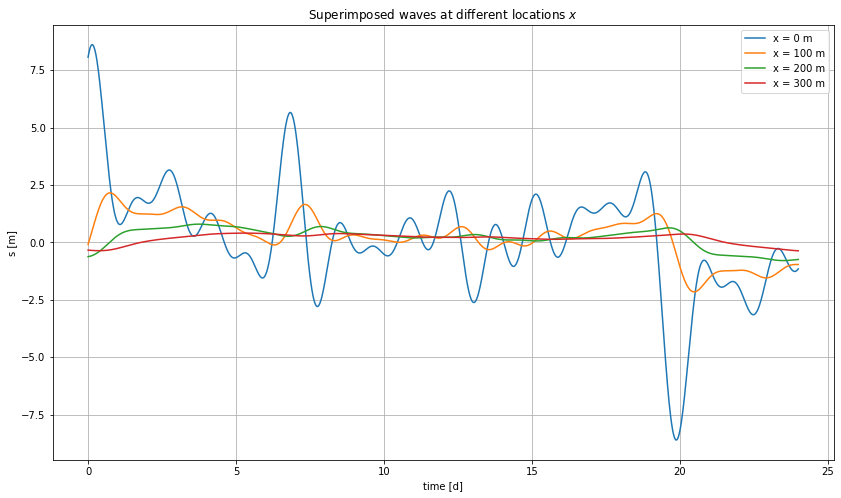

In [11]:
x =[ 0, 100, 200, 300]
t = 24 * np.linspace(0, 1, 24*60 + 1) # every minute

ax = newfig("Superimposed waves at different locations $x$", 'time [d]', 's [m]')

for xi in x:
    y = np.zeros_like(t)
    for omega_i, theta_i in zip(omega, theta):
        a = np.sqrt(omega_i * S /(2 * kD))
        y += A * np.exp(-a * xi) * np.sin(omega_i * t  -  a * xi + theta_i)
    ax.plot(t, y, label='x = {:.0f} m'.format(xi))
ax.legend()


In the plot, each wave is also delayed, and more so, the larger $x$ is. To remove this delay to better show the effect of filtering out the higher frequences, multiply $a$ by zero within the $\sin$ function.

## The envelopes of the individual waves and their superposition

We can also show the envelopes of the individual waves and even superimpose them.

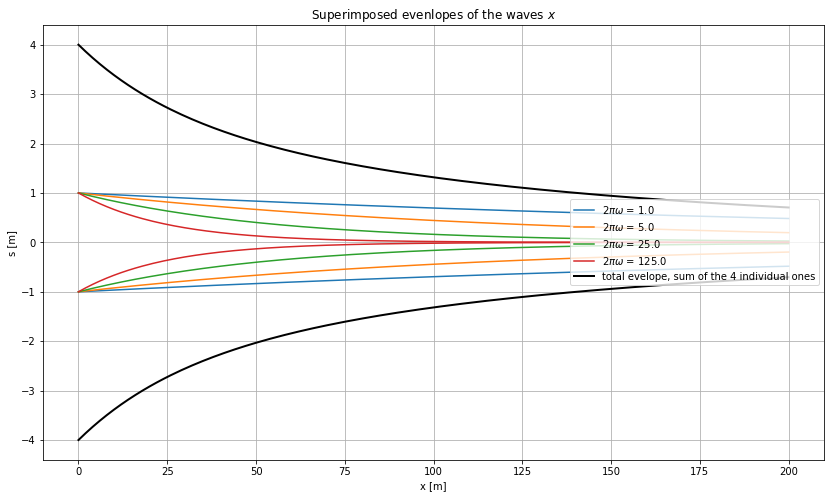

In [23]:
x = np.linspace(0, 200, 201)
omega = np.array([1, 5, 25, 125]) / (2 * np.pi) # cycles per day

ax = newfig("Superimposed evenlopes of the waves $x$", 'x [m]', 's [m]')

y_env_tot = np.zeros_like(x)
for omega_i in omega:
    a = np.sqrt(omega_i * S /(2 * kD))
    y_env = A * np.exp(-a * x)
    ln = ax.plot(x,  y_env, label="$2 \pi \omega$ = {:.1f}".format(omega_i * 2 * np.pi))
    ax.plot(x, -y_env, ln[0].get_color())
    y_env_tot += y_env
ax.plot(x,  y_env_tot, 'k', lw=2, label='total evelope, sum of the 4 individual ones')
ax.plot(x, -y_env_tot, 'k', lw=2)
ax.legend(loc='right')
